<a href="https://colab.research.google.com/github/jesupb/Data_Science_Toolbox/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
We'll work on binary classification with logistic regression. After that, we'll try out a generalization for multiclass logistic regression called _softmax_ regression.

In [7]:
import os
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/datasets/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/datasets


In [9]:
# Load data
df_raw = pd.read_csv('heart.csv')

In [10]:
df_raw.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration
The very first thing we should look into any analysis is our target variable. In classification problems you'll want to check out if your data is imbalanced, in order to explore if any balancing transformations may be needed (e.g. ROSE)

In [11]:
print(df_raw['output'].value_counts())
# data seems to be reasonably balanced, so we won't be using any balancing strategies for this project

1    165
0    138
Name: output, dtype: int64


We'll check for some relationships by just plotting the data: How do our quantitative variables behave when split by our target variable? Are there any visual cues as to which variables might help separate between both classifications in our target variables?

In [12]:
quant_cols = ['age','trtbps','chol','thalachh','oldpeak']
cat_columns = ['sex','cp','fbs','rest_ecg','exng','slp','caa','thall']
print(df_raw[quant_cols].describe())

              age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


Text(0.5, 1.0, 'Scatter plot of age vs oldpeak \n(color coded by target variable)')

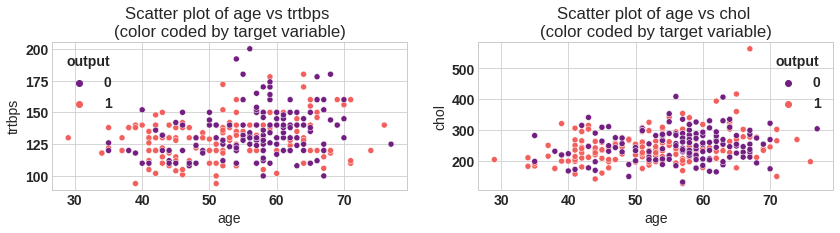

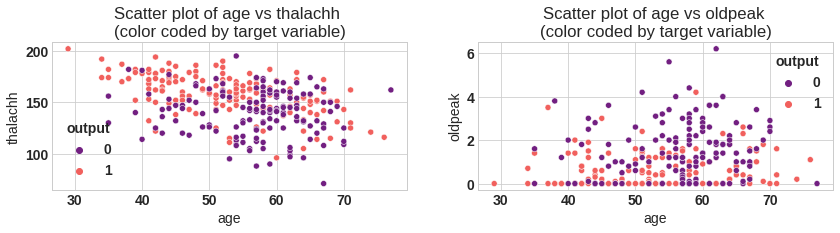

In [25]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
sns.scatterplot(x='age',y='trtbps',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs trtbps \n(color coded by target variable)')


ax = f.add_subplot(222)
sns.scatterplot(x='age',y='chol',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs chol \n(color coded by target variable)')


f = plt.figure(figsize=(14,6))
ax = f.add_subplot(223)
sns.scatterplot(x='age',y='thalachh',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs thalachh \n(color coded by target variable)')


ax = f.add_subplot(224)
sns.scatterplot(x='age',y='oldpeak',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of age vs oldpeak \n(color coded by target variable)')

Do notice that there's a cluster of values labeled '1' (higher risk) for ages around 55 or less, so this dataset doesn't seem to be based on real data. **We'll just use it for practice purposes**.

Text(0.5, 1.0, 'Scatter plot of trtbps vs oldpeak\ncolor coded by target variable')

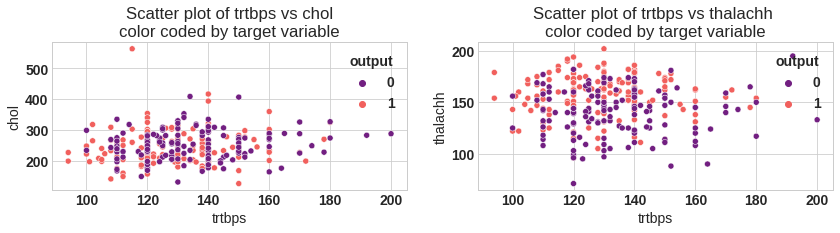

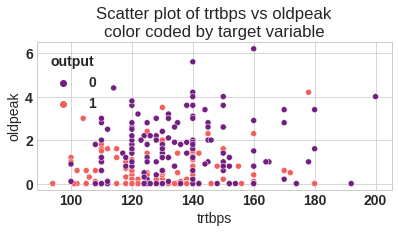

In [27]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
sns.scatterplot(x='trtbps',y='chol',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs chol\ncolor coded by target variable')


ax = f.add_subplot(222)
sns.scatterplot(x='trtbps',y='thalachh',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs thalachh \ncolor coded by target variable')

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(223)
sns.scatterplot(x='trtbps',y='oldpeak',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs oldpeak\ncolor coded by target variable')

Text(0.5, 1.0, 'Scatter plot of trtbps vs thalachh, color coded by target variable')

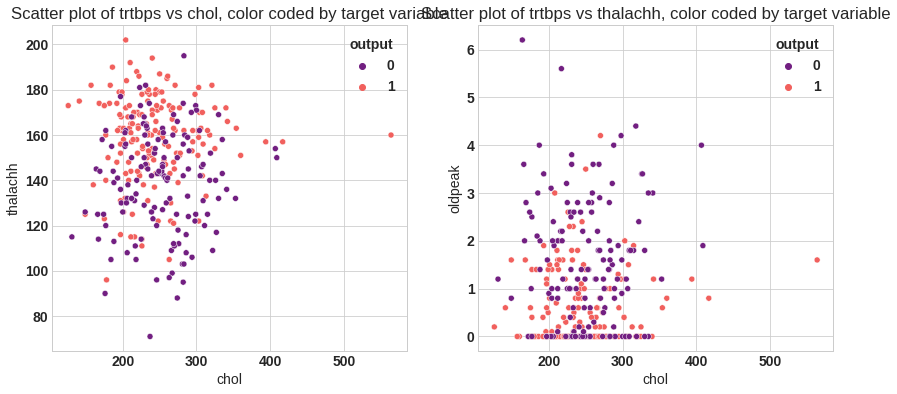

In [17]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='chol',y='thalachh',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs chol, color coded by target variable')


ax = f.add_subplot(122)
sns.scatterplot(x='chol',y='oldpeak',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs thalachh, color coded by target variable')

Text(0.5, 1.0, 'Scatter plot of trtbps vs thalachh, color coded by target variable')

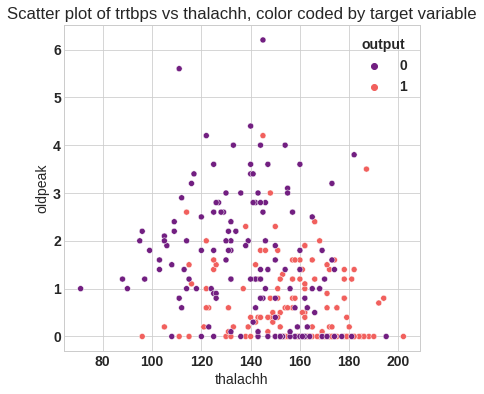

In [18]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='thalachh',y='oldpeak',data=df_raw,palette='magma',hue='output',ax=ax)
ax.set_title('Scatter plot of trtbps vs thalachh, color coded by target variable')

Let's explore how the target variable behaves when split by the categorical variables:

In [38]:
# Excercise: try to define a function to plot a marimekko chart from a pd.crosstab result
# see: https://towardsdatascience.com/marimekko-charts-with-pythons-matplotlib-6b9784ae73a1

print(pd.crosstab(df_raw['output'], df_raw['sex']),'\n')
print(pd.crosstab(df_raw['output'], df_raw['cp']), '\n')
print(pd.crosstab(df_raw['output'], df_raw['exng']), '\n')


sex      0    1
output         
0       24  114
1       72   93 

cp        0   1   2   3
output                 
0       104   9  18   7
1        39  41  69  16 

exng      0   1
output         
0        62  76
1       142  23 



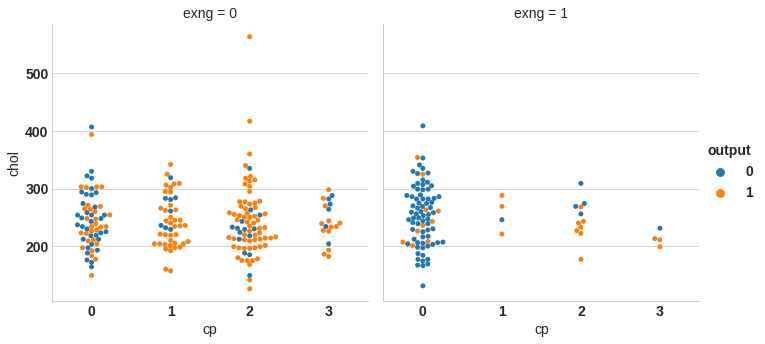

In [35]:
sns.catplot(x="cp", y="chol", hue="output", col = 'exng',kind="swarm", data=df_raw)

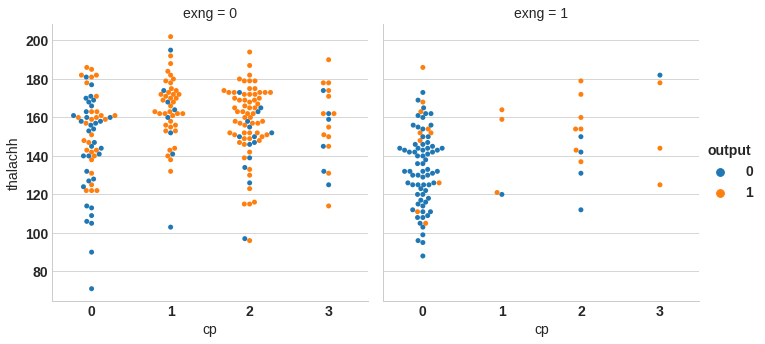

In [36]:
sns.catplot(x="cp", y="thalachh", hue="output", col = 'exng',kind="swarm", data=df_raw)

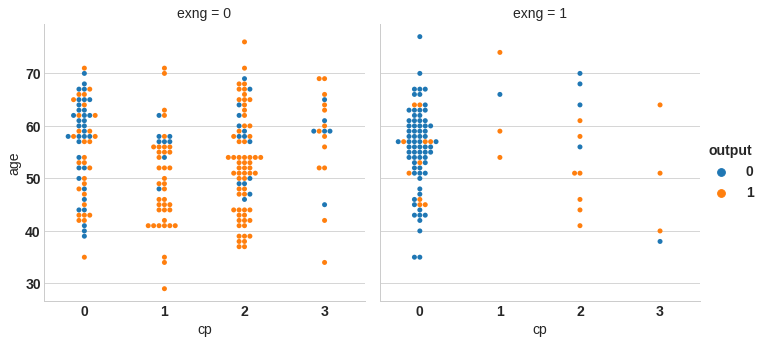

In [37]:
sns.catplot(x="cp", y="age", hue="output", col = 'exng',kind="swarm", data=df_raw)

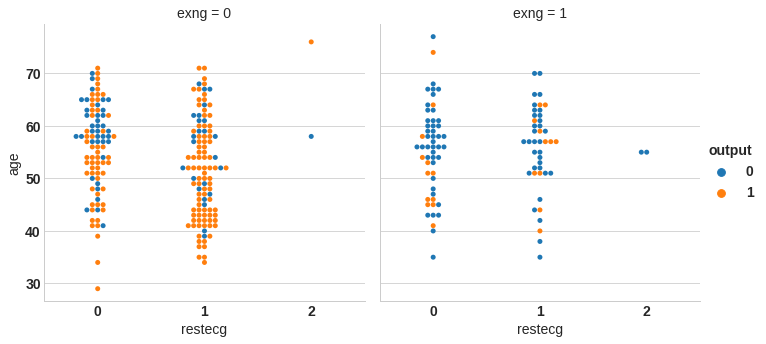

In [39]:
sns.catplot(x="restecg", y="age", hue="output", col = 'exng',kind="swarm", data=df_raw)

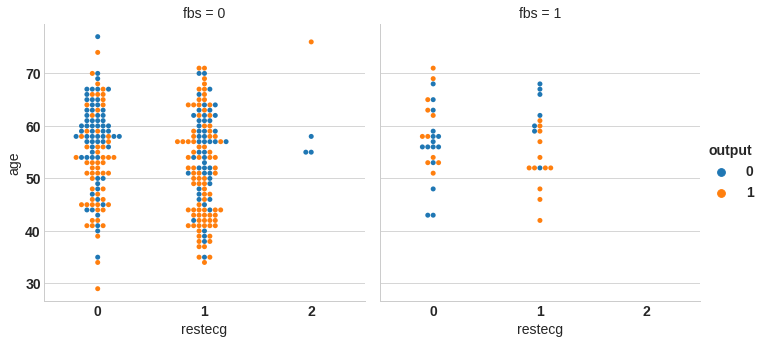

In [40]:
sns.catplot(x="restecg", y="age", hue="output", col = 'fbs',kind="swarm", data=df_raw)

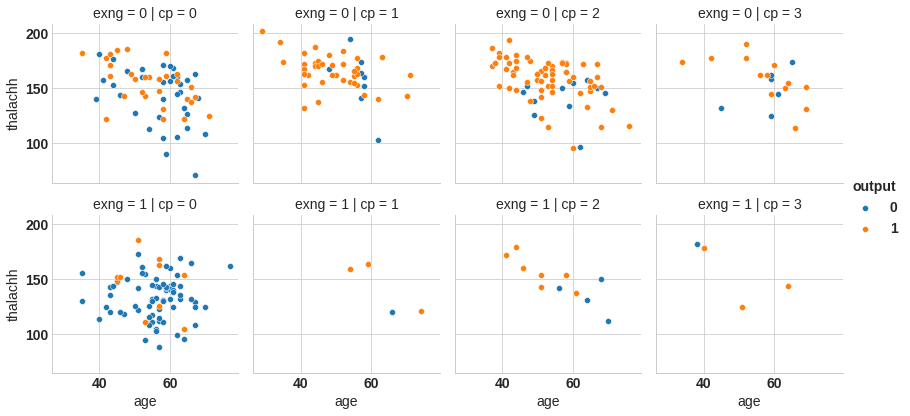

In [59]:
# create a synthetic variable from both [exng] and [cp]

g = sns.FacetGrid(df_raw, col="cp", row = "exng", hue="output")
g.map(sns.scatterplot, "age", "thalachh")
g.add_legend()

From the plots seems like the combination of [age] and [thalachh], together with categorical variables [cp] and [exng] should give out a pretty decent model. We can then go on and try to improve this model with some more variables that we might not have included based on our initial data exploration.

# Data preparation and model fitting
As usual, we'll encode our categorical variables and split the data.

In [65]:
my_cols = ['output','age','thalachh','exng','cp']
df = df_raw[my_cols]
df_encode = pd.get_dummies(data = df, prefix = ['cp','exng'], prefix_sep = '_',
                           columns = ['cp','exng'])

In [67]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X = df_encode.drop('output',axis=1) # Independet variable
y = df_encode['output'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred = logreg.predict(X_test)
1-np.mean(np.abs(y_test - y_pred))

0.7252747252747253